In [3]:
#%matplotlib inline  
#%matplotlib notebook
#%pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Reducción de dimensionalidad

Muchos problemas de *machine learning* involucran miles o millones de *features* para cada instancia de entrenamiento. Este resulta en algoritmos lentos y dificultad en encontrar una solución buena.

Se refiere a este problema como la **maldición de dimensionalidad**.

En muchos casos es posible reducir el número de *features*.

Por ejemplo, con los datos de MNIST todos los pixeles en el borde de la imagen son blancos - podríamos eliminar estos pixeles.

También hay mucha correlación entre pixeles vecinos, así que podríamos unir pixeles.

Reducción del número de *features* también es muy útil para **visualización de datos**.

#### Peculiaridades de altas dimensiones...

![](figures_dimensionalidad/fig8-1.png)

Es muy difícil imaginar un hipercubo de 1000 dimensiones... Además nuestra intuición que viene de $3$ dimensiones no sirve mucho en este caso.

Por ejemplo:

* Si elegimos un punto aleatorio en una cuadrada unitaria (con aristas de longitud $1$), estará a una distancia menor que 0.001 del borde con una probabilidad de 0.4%.
* En un hipercubo de 10,000 dimensiones, cuál sería la probabilidad de elegir un punto tan cerca al borde?

<details>
    <summary>Respuesta</summary>
    <p>99.999999%</p>
</details>

* Si elegimos dos puntos aleatoriamente en una cuadrada unitaria, la distancia entre los dos puntos será, en promedio, $\sim 0.52$.
* Dos puntos aleatorios en un cubo unitario 3D tendrán una separación de $\sim 0.66$.
* En el caso de un hipercubo en 1,000,000 dimensiones?

<details>
    <summary>Respuesta</summary>
    <p>$\sim 408.25$</p>
</details>

Entonces, en datos de altas dimensiones, la mayoría de los puntos tendrán una separación grande. Este podría complicar las predicciones del modelo, ya que ningún punto es cerca a otro...

## Métodos principales para reducción de dimensiones

### Proyección

En muchos datos las instancias no están distribuidas uniformemente a través del espacio de *features*. Muchos *features* son casi constantes y otros están altamente correlacionados.

Este significa que las instancias pertenecen a un sub-espacio del espacio de *features* que tiene menos dimensiones.

![](figures_dimensionalidad/fig8-2.png)

En este ejemplo podemos proyeccionar las instancias al plano:

![](figures_dimensionalidad/fig8-3.png)

Pero para otros datos proyección no sirve, ya que el sub-espacio puede girar y doblar, por ejemplo en el caso del conjunto de datos sintético que se llama el *Swiss roll*:

| ![](figures_dimensionalidad/fig8-4.png) | ![](figures_dimensionalidad/swiss_roll.jpg) |
|-----------------------------------------|---------------------------------------------|

Una proyección de estos datos resultará en aplastar varias capas de los datos y mezclarlas.

![](figures_dimensionalidad/fig8-5.png)

Lo que queremos hacer es desenrollar los datos...

### Aprendizaje de variedad (*manifold learning*)

El *Swiss roll* es un ejemplo de una **variedad**.

Una variedad es un concepto de la matemática (muy usado en la relatividad general). Se puede definir una variedad como un sub-espacio dentro de un espacio de más dimensiones que puede tener una forma geométrica arbitraria, pero que **localmente** se ve como un hiperplano.

Varios algoritmos de reducción de dimensión funcionan por modelar la variedad donde pertenecen las instancias - se llama *manifold learning*.

El método se basa en la suposición de la variedad (*manifold assumption*, *manifold hypothesis*) que dice que la mayoría de conjuntos de datos de alta dimensión del mundo real tienen instancias en una variedad de dimensión baja.

Por ejemplo, los datos de MNIST: hay similitudes entre todas las imagenes. Si generamos intensidades de $28 \times 28$ pixeles aleatoriamente, solamente una fracción infinitesimal de las imagenes van a corresponder a las imagenes del conjunto de MNIST.

Otra suposición es que la tarea de clasificación o regresión será más fácil expresada en el sub-espacio de la variedad, pero no es siempre así...

| ![](figures_dimensionalidad/fig8-6.png) |
|-----------------------------------------|
| El límite de decisión es más simple en el sub-espacio en el caso de arriba, pero no así en el caso de abajo. |

## PCA (*Principal Component Analysis*)

PCA identifica el hiperplano más cerca a los datos, y después proyecciona los datos a este plano.

Primero, hay que elegir el hiperplano correcto...

|![](figures_dimensionalidad/fig8-7.png)|
|---------------------------------------|
| Proyección a la línea sólida preserva la máxima de la varianza. |

En PCA elegimos el hiperplano que mantiene la varianza de los datos. Es el hiperplano que minimiza la distancia promedia cuadrada entre los datos originales y su proyección.

Procedimiento:

1. Encontramos el eje que representa la máxima varianza de los datos.
2. Encontramos un segundo eje, orotogonal al primero, que representa la máxima de la varianza que queda.
3. Etc.

El vector unitario que define el $i$-esima eje se llama el $i$-esima componente principal. El método ocupado para encontrar estos vectores se llama *Singular Value Decomposition* (SVD).

| ![](figures_dimensionalidad/fig8-2.png) |
|-----------------------------------------|
| Los dos componentes principales son los vectores indicados. El tercero sería un vector ortogonal al plano. |

#### *Singular Value Decomposition*

El método de SVD encuentra una factorización de una matriz $X$ de dimensión $m \times n$ tal que se puede escribir la matriz como el producto de $3$ matrices:

$$X = U \Sigma V^T$$

* $U$ es una matriz ortogonal de dimensión $m \times m$.
* $\Sigma$ es una matriz diagonal rectangular ($m \times n$) con números reales no-negativos en la diagonal.
* $V^T$ es otra matriz ortogonal de $n \times n$.

Una matriz ortogonal satisface $U^T U = 1$. Geometricamente, que significa una transformación de un vector por una matriz ortogonal?

| <img src="figures_dimensionalidad/svd.png" width=400> |
|--------------------------------------|
| Crédito: Wikipedia                   |

Se puede calcular el SVD por métodos iterativos. La descomposición **no** es única!

La matriz $V$ contiene los componentes principales como vectores de columna.

In [2]:
# Datos en 3D

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

<IPython.core.display.Javascript object>


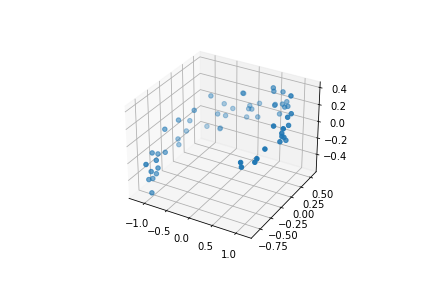

In [20]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter3D(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2]);
plt.show()

**Importante**: para implementar PCA, los datos tiene que estar **centrados**. Los métodos de PCA de Scikit-Learn automáticamente centran los datos.

Una vez calculados los componentes principales, se puede reducir la dimensionalidad de los datos a $d$ dimensiones por proyección al hiperplano definido por los primeros $d$ componentes principales:

$$X_{proy} = XW_{d}$$

donde $W_d$ es una matriz que contiene los primeros $d$ vectores de columna de la matrix $V$.

* $X$ es $m \times n$ ($m$ filas, cada fila representa una instancia).
* $V$ es $n \times n$ (matriz cuadrada, $n$ es el número de *features*).
* $W_d$ es $n \times d$ ($d$ es la dimensión del hiperplano de proyección).

Entonces $X_{proy}$ es de dimensión $m \times d$, i.e. representa $m$ instancias, con $d$ *features* para cada instancia.

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

<IPython.core.display.Javascript object>


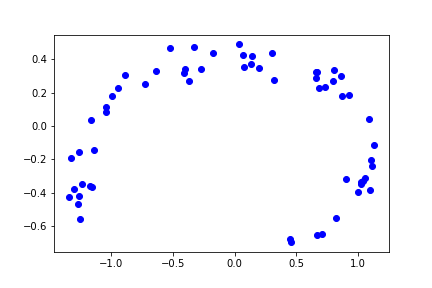

In [14]:
plot(X2D[:,0], X2D[:,1], 'bo')

#### Con Scikit-Learn...

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [21]:
c1 = pca.components_.T[:, 0]

In [22]:
c2 = pca.components_.T[:, 1]

<IPython.core.display.Javascript object>


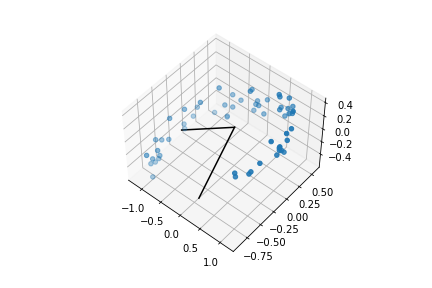

In [25]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2]);
ax.plot3D([0, c1[0]], [0, c1[1]], [0, c1[2]], 'k-')
ax.plot3D([0, c2[0]], [0, c2[1]], [0, c2[2]], 'k-')

La **razón de varianza explicada** (*explained variance ratio*) es la proporción de la varianza de los datos ubicada en el eje de cada componente principal:

In [26]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

Hay 84.2% de la varianza en el primer eje, y 14.6% en el segundo. Así que queda solamente 1.2% para el tercer eje.

Podemos especificar la cantidad de varianza que queremos captar de los datos usando la opción `n_components` con un valor real entre 0.0 y 1.0:

In [35]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [36]:
X_reduced.shape

(60, 2)

Para datos con muchas dimensiones podemos investigar como varia la varianza explicada con más componentes de PCA.

![](figures_dimensionalidad/fig8-8.png)

### PCA para compresión de datos

Se puede comprimir los datos por el uso de PCA.

Por ejemplo, con los datos de MNIST se puede reducir de 784 dimensiones a ~150 dimensiones, manteniendo 95% de la varianza. $\Rightarrow$ $\sim 20$% del tamaño de los datos originales.

También se puede descomprimir los datos reducidos para recuperar la dimensionalidad original, por el uso de la inversa de la transformación de PCA:

$$X_{\text{recuperado}} = X_{proy}W_d^T$$

Los datos descomprimidos faltarán información perdida en el proceso de aplicar la proyección al subespacio de dimensionalidad menor.

Ejemplo:

```
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
```

![](figures_dimensionalidad/fig8-9.png)

#### PCA aleatorio (*Randomized PCA*)

Algoritmo estocástico para aproximar los primeros $d$ componentes principales.

Complejidad computacional: $\mathcal{O}(m \times d^2) + \mathcal{O}(d^3)$ en vez de $\mathcal{O}(m \times n^2) + \mathcal{O}(n^3)$ para PCA normal. $\Rightarrow$ mucho más rápido para $d \ll n$.

```
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)
```

Por defecto `svd_solver="auto"`: Scikit-Learn ocupa *randomized PCA* si $m > 500$ | $n > 500$ y $d < 0.8m$ | $d < 0.8n$. Si no, ocupa SVD normal.

Para forzar SVD normal: `svd_solver="full"`

#### PCA incremental

Con este método se puede entrenar el modelo con *mini-batches* (para conjuntos grandes de datos y entrenamiento *on-line*).

Hay que usar `partial_fit()` en vez de `fit()`.

```
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)
```

Otro método es usar `memmap` de NumPy, que permite la representación de un archivo de binario guardado en el disco como un array grande.

```
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)
```

### Kernel PCA

En el Notebook sobre SVMs vimos que se puede mapear las instancias a un espacio de *features* de muchas dimensiones con el uso de los *kernels*.

Se puede hacer lo mismo con PCA.

Por ejemplo, el código abajo ocupa kPCA (kernel PCA) con *kernels* de RBF y de sigmoide para los datos del *swiss roll*.

In [4]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

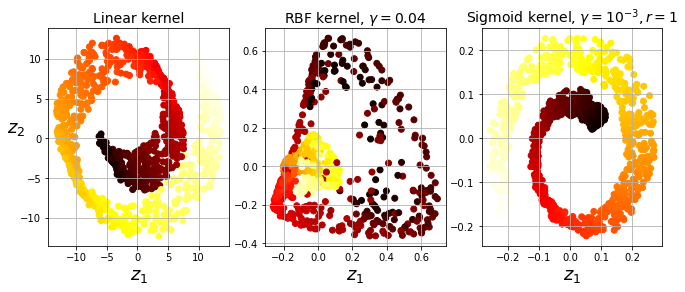

In [5]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

El *kernel* "linear" es equivalente a usar PCA normal.

#### Elegir un *kernel* y ajustar los hiperparámetros

kPCA es un algoritmo sin supervisión, así que no se puede determinar su rendimiento basado en precisión o algo así.

Ya que reducción de dimensionalidad es típicamente un paso de preparación antes de entrenar un modelo de clasificación, se puede usar *grid search* para encontrar los hiperparámetros que maximizan el rendimiento del clasificador.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [7]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

In [11]:
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

In [12]:
grid_search = GridSearchCV(clf, param_grid, cv=3)

In [13]:
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [15]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

##### Otro método - error de reconstrucción

Podemos elegir el *kernel* y hiperparámetros que resultan en el error de reconstrucción más bajo.

Es más complicado aplicar reconstrucción con *kernel* PCA...

![](figures_dimensionalidad/fig8-11.png)

Aplicación de kPCA con *kernel* RBF es equivalente a mapear los datos originales a un espacio de dimensión infinita con $\phi$ y después proyectar al espacio bidimensional.

Reconstrucción de un punto en el espacio reducido (después de la aplicación de PCA lineal) resultaría en un punto en el espacio infinito...

Así que, no es posible calcular el error de reconstrucción verdadero en este caso!

Se puede encontrar un punto en el espacio **original** que mapearía a un punto cercano al punto reconstruido $\Rightarrow$ **pre-imagen de reconstrucción** (*reconstruction pre-image*).

El error de reconstrucción (del pre-imagen) es la distancia cuadrada a la instancia original.

In [16]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

1.0043252746540465e-26